### Importing necessary libraries

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

### Importing the News Dataset 

In [3]:
df1 = list(np.array(pd.read_csv('news_dataset_jan.csv',index_col = 0)))
df2 = list(np.array(pd.read_csv('news_dataset_feb.csv',index_col = 0)))
df3 = list(np.array(pd.read_csv('news_dataset_mar.csv',index_col = 0)))
df4 = list(np.array(pd.read_csv('news_dataset_apr.csv',index_col = 0)))
df5 = list(np.array(pd.read_csv('news_dataset_may.csv',index_col = 0)))
df6 = list(np.array(pd.read_csv('news_dataset_jun.csv',index_col = 0)))
df7_8 = list(np.array(pd.read_csv('news_dataset_jul_aug.csv',index_col = 0)))

In [4]:
df = pd.DataFrame(df1 + df2 + df3 + df4 + df5 + df6 + df7_8)

In [5]:
df = df.drop_duplicates()

In [6]:
print(df.shape)

df.head(5)

(16272, 4)


,0,1,2,3
0,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Banking system get...,Banks showed an overall improvement with their...,https://www.business-standard.com/article/fina...
1,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Fractured mandate ...,Corporate bosses to invest more in new year; e...,https://www.business-standard.com/article/elec...
2,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Brands must step o...,The trend has been mostly to create fewer and ...,https://www.business-standard.com/article/comp...
3,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Realty developers ...,"A slew of measures such as demonetisation, goo...",https://www.business-standard.com/article/comp...
4,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Amazon's deal with...,Shares of Kishore Biyani-led firm fall 11 per ...,https://www.business-standard.com/article/comp...


In [8]:
data = df[1].values + df[2].values

### Concatenating all the individual documents(sentences) into one sentence

In [9]:
text = ' '.join(sent for sent in data)

print ("There are {} words in the combination of all review.".format(len(text)))

There are 3297322 words in the combination of all review.


In [24]:
def text_cleaning(data,stopwords):

    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]

    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]

    # Remove Emails
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

    # Remove Punctuation
    data = [re.sub(r'[^\w\s]',' ', sent) for sent in data]

    # Remove Digits/Numericals
    data = [re.sub(" \d+", ' ', sent) for sent in data]

    # Remove Extra Whitespace
    data = [re.sub(' +', ' ', sent) for sent in data]

    # Convert to Lowercase
    data = [sent.lower() for sent in data]
    
    #Remove Stopwords
    for word in stopwords:
        data = pd.DataFrame(data).replace({" " + word + " ": " "}, regex=True) 

    
    return data

### Create the Stopword List

In [25]:
stopwords = set(STOPWORDS)
stopwords.update(["per", "cent", "crore", "rs", "india",
                  "say","says","year","may","three","million",
                 "us","will","indian","said","new","indias",
                 "one"])


In [26]:
data = text_cleaning(data,stopwords)

### Generate a word cloud image

In [27]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=10,
                          max_font_size=50, 
                          random_state=42
    
                         ).generate(text)

### Display the generated WordCloud Image

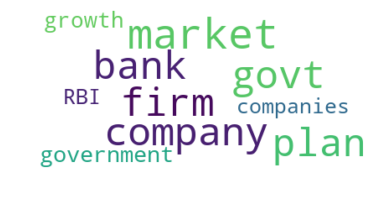

In [28]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
import re
from nltk.util import ngrams
import collections

In [14]:
s = text.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
tokens = [token for token in s.split(" ") if token != ""]
output = list(ngrams(tokens, 2))

In [15]:
output

[('\r\r\n\t\t\t\t\t', '\t\t\t\t\t'),
 ('\t\t\t\t\t', 'banking'),
 ('banking', 'system'),
 ('system', 'getting'),
 ('getting', 'back'),
 ('back', 'to'),
 ('to', 'health'),
 ('health', 'as'),
 ('as', 'npas'),
 ('npas', 'on'),
 ('on', 'the'),
 ('the', 'decline'),
 ('decline', 'rbi'),
 ('rbi', 'report\t\t\t\t\t'),
 ('report\t\t\t\t\t', 'banks'),
 ('banks', 'showed'),
 ('showed', 'an'),
 ('an', 'overall'),
 ('overall', 'improvement'),
 ('improvement', 'with'),
 ('with', 'their'),
 ('their', 'gross'),
 ('gross', 'npa'),
 ('npa', 'ratio'),
 ('ratio', 'declining'),
 ('declining', 'from'),
 ('from', '11'),
 ('11', '5'),
 ('5', 'in'),
 ('in', 'march'),
 ('march', '2018'),
 ('2018', 'to'),
 ('to', '10'),
 ('10', '8'),
 ('8', 'in'),
 ('in', 'september'),
 ('september', '2018'),
 ('2018', '\r\r\n\t\t\t\t\t'),
 ('\r\r\n\t\t\t\t\t', '\t\t\t\t\t'),
 ('\t\t\t\t\t', 'fractured'),
 ('fractured', 'mandate'),
 ('mandate', 'bigger'),
 ('bigger', 'risk'),
 ('risk', 'than'),
 ('than', 'trade'),
 ('trade', 'wa

In [16]:
esBigramFreq = collections.Counter(output)

In [17]:
esBigramFreq.most_common(10)

[(('\r\n\t\t\t\t\t', '\t\t\t\t\t'), 9833),
 (('\r\r\n\t\t\t\t\t', '\t\t\t\t\t'), 6439),
 (('in', 'the'), 2291),
 (('of', 'the'), 2115),
 (('to', 'the'), 931),
 (('per', 'cent'), 918),
 (('for', 'the'), 754),
 (('on', 'the'), 737),
 (('to', 'be'), 717),
 (('india', 's'), 611)]

In [1]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import os

path = 'C:/Users/prash/Downloads/STOCK MARKET/'

C:\Users\prash\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
news_df = pd.read_csv(path + 'DATASETS/' + 'india-news-headlines.csv')

In [18]:
coherence_scores_df = pd.read_csv(path + 'DATASETS/' + 'Coherence_Scores.csv')

In [21]:
coherence_scores_df = coherence_scores_df.round(2)

for i in range(len(coherence_scores_df['Alpha'])):
    if((coherence_scores_df['Alpha'][i] != 'symmetric') and (coherence_scores_df['Alpha'][i] != 'asymmetric')):
        coherence_scores_df['Alpha'][i] = round(float(coherence_scores_df['Alpha'][i]),2)
        
        
for i in range(len(coherence_scores_df['Beta'])):
    if((coherence_scores_df['Beta'][i] != 'symmetric') and (coherence_scores_df['Beta'][i] != 'asymmetric')):
        coherence_scores_df['Beta'][i] = round(float(coherence_scores_df['Beta'][i]),2)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [22]:
coherence_scores_df.iloc[:,1:]

,Topics,Alpha,Beta,Coherence
0,5,0.01,0.01,0.69
1,5,0.01,0.41,0.55
2,5,0.01,0.81,0.55
3,5,0.01,symmetric,0.56
4,5,0.41,0.01,0.69
...,...,...,...,...
75,14,symmetric,symmetric,0.62
76,14,asymmetric,0.01,0.68
77,14,asymmetric,0.41,0.58
78,14,asymmetric,0.81,0.57
